## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**


In [19]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data Filter Warning Libraries
import warnings 
warnings.filterwarnings('ignore')

#Import Data Logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 2:

**Data Uploading using Pandas Function**

In [20]:
#Load the dataset

url='https://raw.githubusercontent.com/Saimehtre18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56,44.14
46,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.05
82,401.8,94.7,0.0,147.4,11.4,946.8,852.1,3,41.10
812,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90,34.68
850,156.0,243.0,0.0,180.0,11.0,1022.0,698.0,28,37.36
...,...,...,...,...,...,...,...,...,...
831,154.0,144.0,112.0,220.0,10.0,923.0,658.0,28,16.50
311,295.7,0.0,95.6,171.5,8.9,955.1,859.2,28,39.94
131,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,28,52.20
833,152.0,178.0,139.0,168.0,18.0,944.0,695.0,28,36.35


## Step 3:

**Doing Exploratory Data Analysis [EDA] :-->**

1. Univariate Analysis

2. Bi Variate Analysis

In [22]:
#Performing Univariate Analysis

from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'Feature':i,
        'Type':df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Standard deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75)-df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats
# df_stats.style.background_gradient(subset=['Missing','Mean','Mode','IQR','Kurtosis','Min','Max','Type','Unique','Median','Standard deviation','Skewness'],cmap='Reds')

,Feature,Type,Missing,Unique,Mode,Mean,Median,Min,Max,Standard deviation,Skewness,Kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,272.900,102.00,540.0,104.506364,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,22.000,0.00,359.4,86.279342,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,0.000,0.00,200.1,63.997004,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,185.000,121.80,247.0,21.354219,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,6.400,0.00,32.2,5.973841,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,968.000,801.00,1145.0,77.753954,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,779.500,594.00,992.6,80.175980,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,28.000,1.00,365.0,63.169912,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,34.445,2.33,82.6,16.705742,0.416977,-0.313725,22.425


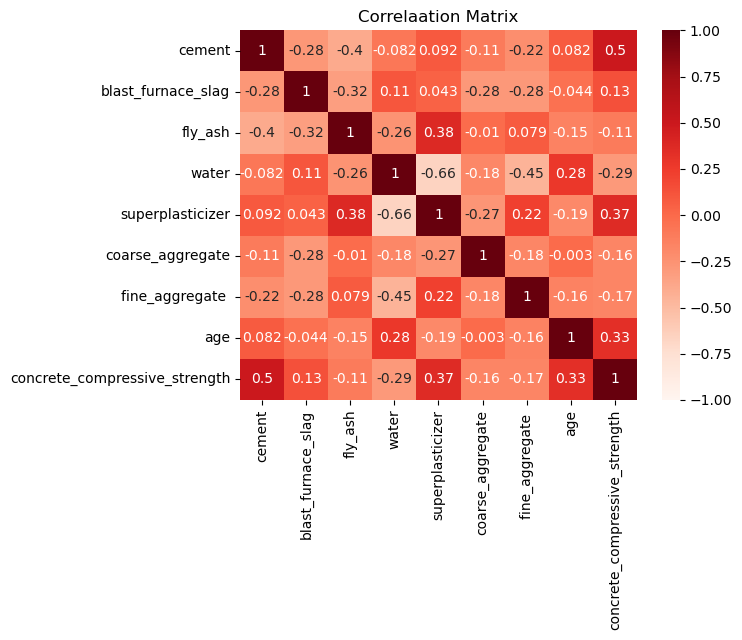

In [27]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---->['concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlaation Matrix')
plt.show()